### CONSTANTS

In [1]:
DATA_PATH = "data/predictive_maintenance.csv"
NUMERICAL_FEATURES = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]',
                       'Torque [Nm]', 'Tool wear [min]']
CATEGORICAL_FEATURES = ['Type']
TARGET = "Target"

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import heatmap, scatterplotmatrix

In [3]:
def convert_list_to_tuples(lst):
  """Converts a list of strings to a list of tuples, where each tuple contains the string and an index."""
  result = []
  for item in lst:
    for i in range(2):
      result.append((item, i))
  return result

### 0. Reading Data

In [4]:
data = pd.read_csv(DATA_PATH).drop(columns=['UDI', 'Product ID', 'Failure Type'])
print(f"Data shape: {data.shape}")
data.head()

Data shape: (10000, 7)


,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


### 1. Data Visualization

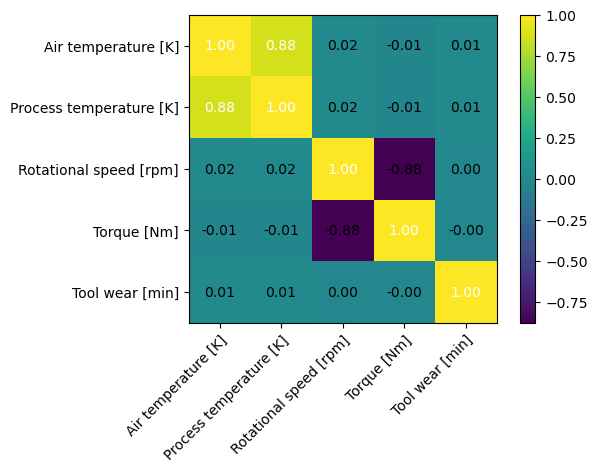

In [5]:
correlations = data[NUMERICAL_FEATURES].corr().values
hm = heatmap(correlations, figsize=(6,4), row_names=NUMERICAL_FEATURES, column_names=NUMERICAL_FEATURES)

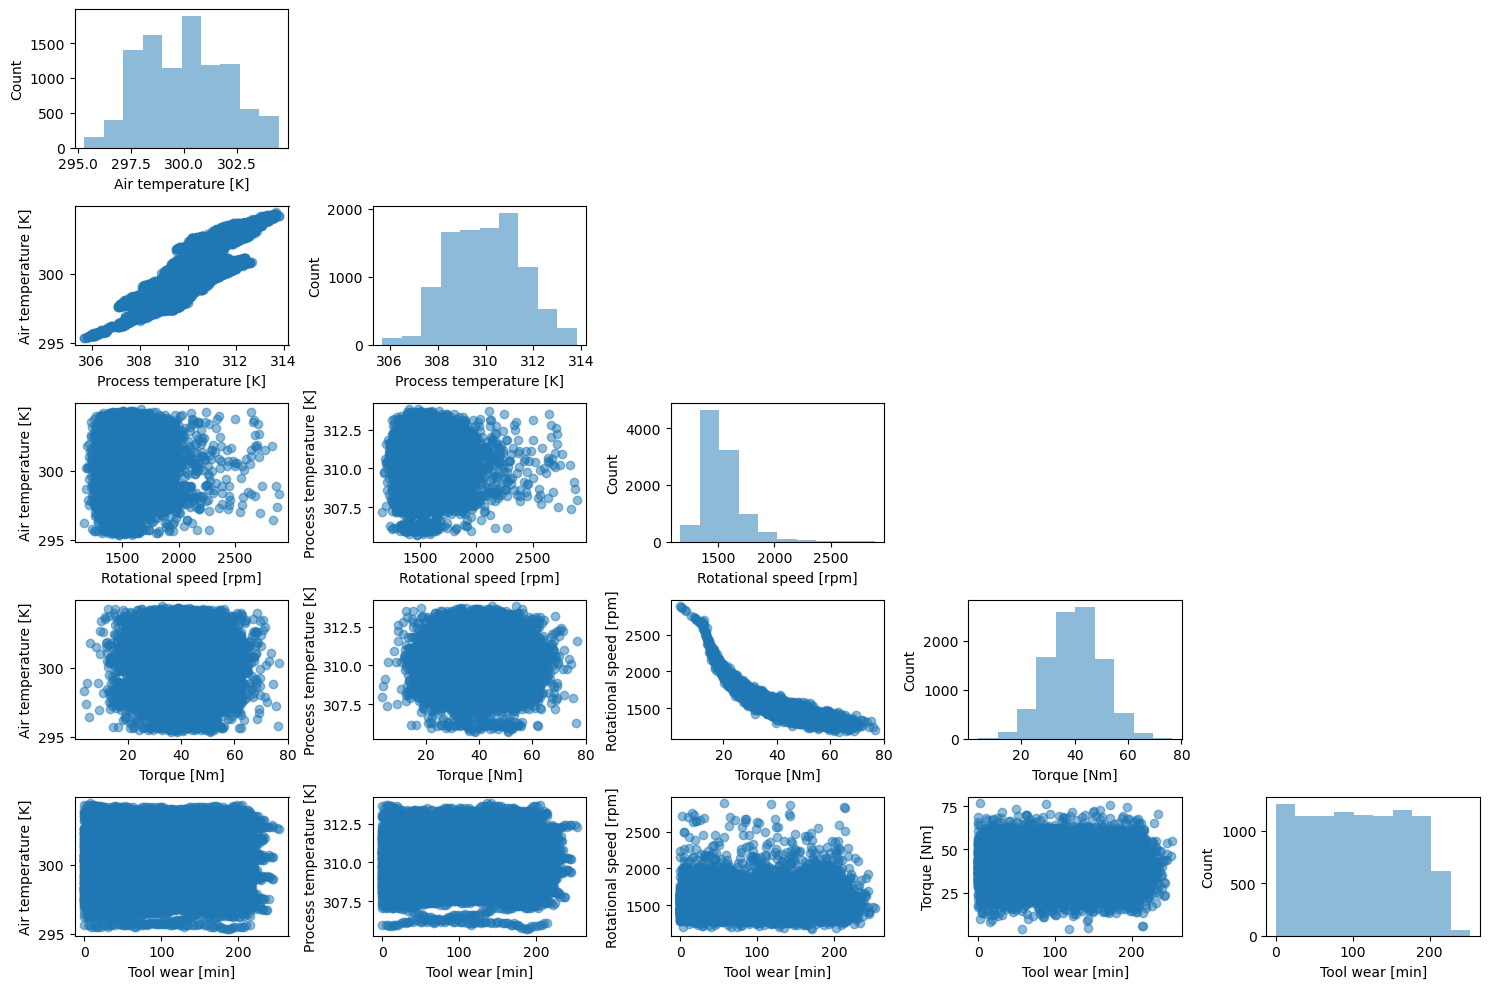

In [6]:
scatterplotmatrix(data[NUMERICAL_FEATURES].values, names=NUMERICAL_FEATURES, figsize=(15,10), alpha=0.5)
plt.tight_layout()

In [7]:
data[TARGET].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Classes')

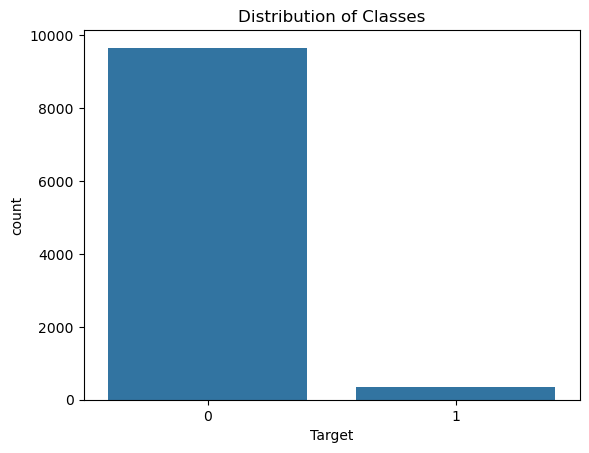

In [11]:
sns.barplot(data[TARGET].value_counts())
plt.title("Distribution of Classes")

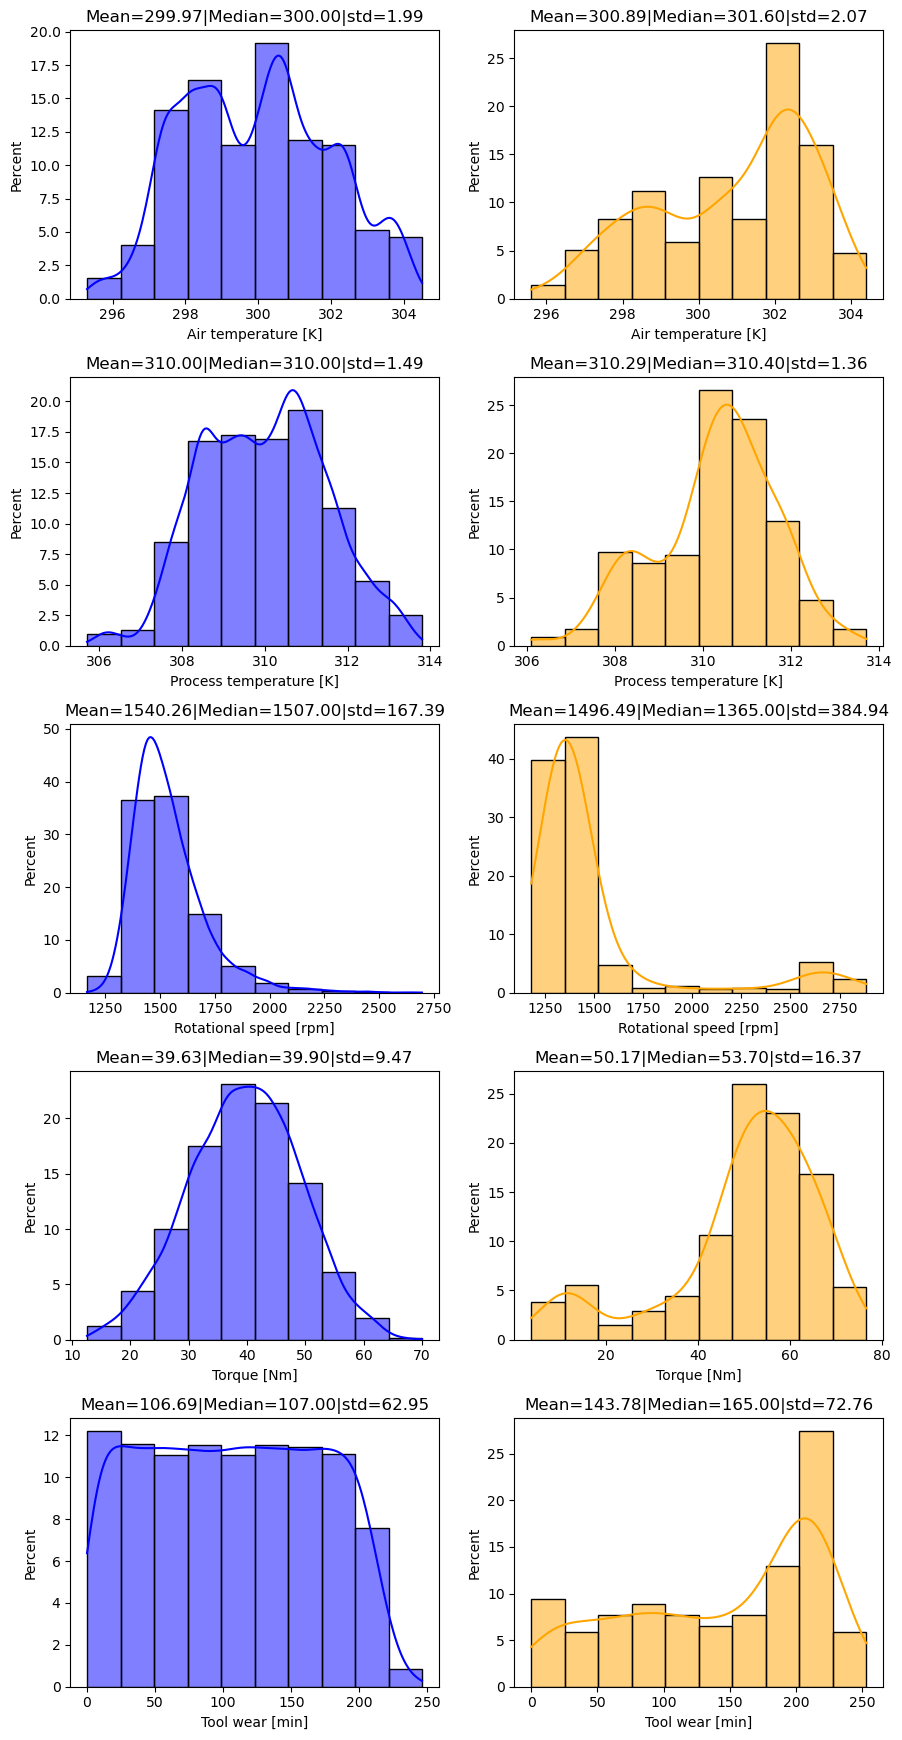

In [51]:
feature_tuples = convert_list_to_tuples(NUMERICAL_FEATURES)
rows = len(NUMERICAL_FEATURES)
cols = 2
fig = plt.figure(figsize=(9, rows*3.5))
for i, (column, target) in enumerate(feature_tuples, 1):
    c = 'blue'
    if target==1:
        c = 'orange'
    x = data[data[TARGET]==target][column]
    fig.add_subplot(rows, cols, i)
    sns.histplot(x=x, bins=10, stat="percent", kde=True, color=c)
    plt.title(f"Mean={x.mean():.2f}|Median={x.median():.2f}|std={x.std():.2f}")

plt.tight_layout()